In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

basically firstlly create a virtual environment in termianl ie python -m venv <env_name>
now actiavte it by <env_name>\scripts\activate
now as it is activated now install pip install jupyter
now install pip install ipykernel
now install pip install-m ipykernel install --user --name=<env_name> --display-name "Python (<env_name>)" this will create a kernel with virtual environment that you can select for the process 
now install numpy and pandas in that virtual environment
then you are set to go with the code



random numbers predictable and everytime same random numbers are generated and not changed as the code is changed

In [2]:
np.random.seed(0)

In [3]:
#now to load the data
#here in x axis we are taking dogs flappiness index 
#here the function is a normal or gaussian distribution where mean = 5 and standard deviation = 1 and size of 10
dogs_whisker_length = np.random.normal(loc=5,scale=1,size = 10)
dogs_ear_flappiness_index = np.random.normal(loc=8,scale=1,size=10)

In [4]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [5]:
cats_whisker_length = np.random.normal(loc=8,scale=1,size=10)
cats_ear_flappiness_index = np.random.normal(loc=5,scale=1,size=10)

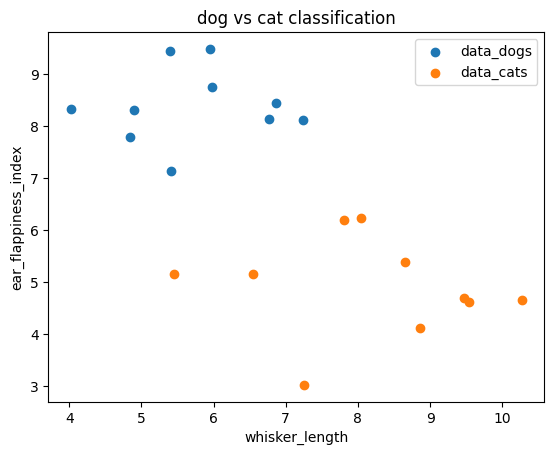

In [6]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label='data_dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label = 'data_cats')
plt.xlabel('whisker_length')
plt.ylabel('ear_flappiness_index')
plt.title('dog vs cat classification')
plt.legend()
plt.show()

In [7]:
#implementing random linear classifier algorithm
#here k is number of lines and d is the number of attributes taken ie 2
#theta is composed of theta1 and theta2 and then there is theta0
def random_linear_classifier(data_dogs,data_cats,k,d):
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
#here we are taking the range and for each iteration a random theta and a random theta0 is selected 
    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()

#here we find error between our pridiction and the actual data from compute_error function
        error = compute_error(data_dogs,data_cats,theta,theta0)

        if error <best_error:
            best_error= error
            best_theta=theta
            best_theta0=theta0

    return best_theta,best_theta0

In [8]:
def compute_error(data_dogs,data_cats,theta,theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta,x_dog) + theta0 <= 0:
            error +=1
    for x_cat in data_cats:
        if np.dot(theta,x_cat) + theta0 > 0:
            error +=1
    return error

In [9]:
dogs_data = np.vstack((dogs_whisker_length,dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length,cats_ear_flappiness_index)).T


In [10]:
dogs_data
cats_data

array([[ 5.44701018,  5.15494743],
       [ 8.6536186 ,  5.37816252],
       [ 8.8644362 ,  4.11221425],
       [ 7.25783498,  3.01920353],
       [10.26975462,  4.65208785],
       [ 6.54563433,  5.15634897],
       [ 8.04575852,  6.23029068],
       [ 7.81281615,  6.20237985],
       [ 9.53277921,  4.61267318],
       [ 9.46935877,  4.69769725]])

In [11]:
#run random linear classifier algorithm 
k=100 # numeber of iteratuions 
d=2 # number of features
best_theta , best_theta0 = random_linear_classifier(dogs_data,cats_data,k,d)

In [12]:
best_theta

array([-1.07075262,  1.05445173])

In [13]:
best_theta0

-0.40317694697317963

In [14]:
#plot the discision boundary 

x_vals = np.linspace(2,10,100)
y_vals = - (best_theta[0] / best_theta[1]) * x_vals - (  best_theta0 / best_theta[1])


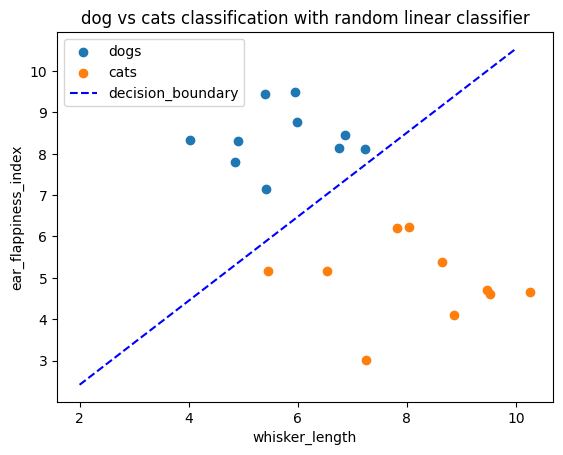

In [15]:
plt.scatter(dogs_whisker_length,dogs_ear_flappiness_index,label='dogs')
plt.scatter(cats_whisker_length,cats_ear_flappiness_index,label='cats')
plt.plot(x_vals,y_vals,color='blue',linestyle='--',label='decision_boundary')
plt.xlabel('whisker_length')
plt.ylabel('ear_flappiness_index')
plt.title('dog vs cats classification with random linear classifier')
plt.legend()
plt.show()
